In [0]:
import pandas as pd
import matplotlib.pyplot as polt
from textblob import TextBlob

## Downloading "Gold" movie review data

In [2]:
# Reading tweets from csv file
df = pd.read_csv("gold.csv",encoding="ISO-8859-1")
raw_tweets = df.text
print(raw_tweets.head())

0    Exclusive Goldmovie Gold1st Day 25.25cr2nd Day...
1    Really disappointed with GoldMovie 2nd day col...
2    Hats off akshaykumar Its a masterpiece. The l...
3    Believe me... akshaykumar going to have the sa...
4    Hindi Movies USA Gross till 8/17/18 GoldMovie ...
Name: text, dtype: object


In [10]:
raw_tweets.shape

(1957,)

In [0]:
tweets=[]
for tweet in raw_tweets:
    # empty dictionary to store required params of a tweet
    structured_tweet = {}
    # saving text of tweet
    structured_tweet['text'] = tweet
#    print(structured_tweet)
    # saving sentiment of tweet
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        structured_tweet['sentiment'] = 'positive'
        structured_tweet['polarity'] = analysis.sentiment.polarity
    elif analysis.sentiment.polarity == 0:
        structured_tweet['sentiment'] = 'neutral'
        structured_tweet['polarity'] = analysis.sentiment.polarity
    else:
        structured_tweet['sentiment'] = 'negative'
        structured_tweet['polarity'] = analysis.sentiment.polarity
    tweets.append(structured_tweet)

In [4]:
print(tweets[1])

{'text': "Really disappointed with GoldMovie 2nd day collection I thought this movie will do enter 100cr club in 3 4 day but it has proved me wrong I don't know what happened I have already watched this movie and it's amazing. akshaykumar kagtireema ritesh_sid", 'sentiment': 'negative', 'polarity': -0.16249999999999998}


## Proportion of positive and negative tweets

In [5]:
pos_tweets = [x for x in tweets if x['sentiment'] == 'positive']
#print(pos_tweets)
# % of positive tweets
print("Positive tweet {} %".format(100 * len(pos_tweets) / len(tweets)))
# Separating negative tweets from tweets
neg_tweets = [x for x in tweets if x['sentiment'] == 'negative']
# % of negative tweets
print("Negative tweets {} %".format(100 * len(neg_tweets) / len(tweets)))
# % of neutral tweets
print("Neutral tweets {} % ".format(100 * (len(tweets) - len(neg_tweets) - len(pos_tweets)) / len(tweets)))

Positive tweet 55.90189064895248 %
Negative tweets 5.927439959121104 %
Neutral tweets 38.17066939192642 % 


## Top positive and negative tweets

In [6]:
##printing top positive and negative tweets

ptext = []
ntext = []

for x in tweets:
    if x['polarity'] > 0.8:
        ptext.append(x['text'])

for x in tweets:
    if x['polarity'] < -0.7:
        ntext.append(x['text'])

# printing tweets
print("\n Positive tweets:")
print(ptext[:5])

print("\n Negative tweets:")
print(ntext[:5])



 Positive tweets:
['Watched GoldMovie today . What a brilliant performance by akshaykumar . Nailed it . Gold . GoForGold', 'Now watching GoldMovie till intermission its brilliant akshaykumar is superb', 'Watched GoldMovie today . What a brilliant performance by akshaykumar . Nailed it . Gold . GoForGold', 'Now watching GoldMovie till intermission its brilliant akshaykumar is superb', 'Watched GoldMovie today . What a brilliant performance by akshaykumar . Nailed it . Gold . GoForGold']

 Negative tweets:
['The Biggest Joke is SatyamevaJayate tagline is "Ab Corruption Mitega" amp; the Joker Producers TSeries are doing Horrible Corruption by inflating BO numbers by paying to Box_Off_India amp; taran_adarsh.. 16 se 18 .. 18 se 20 Gold GoldMovie']


##Wordcloud for positive tweets

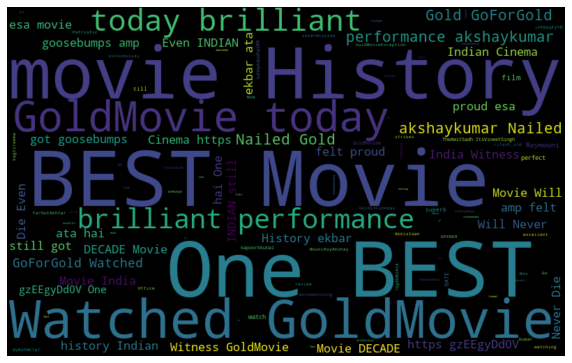

In [8]:
def print_worldcloud(words):
    from wordcloud import WordCloud
    word_cloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    polt.figure(figsize=(10, 7))
    polt.imshow(word_cloud, interpolation="bilinear")
    polt.axis('off')
    polt.show()


all_words = ' '.join([text for text in ptext])
print_worldcloud(all_words)



##Wordcloud for negative tweets

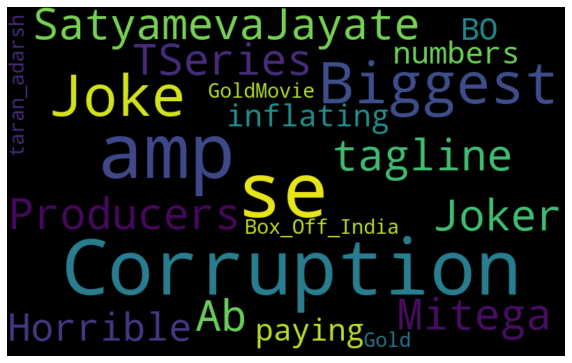

In [9]:
all_words = ' '.join([text for text in ntext])
print_worldcloud(all_words)